In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
pd_data = pd.read_csv(url, header = None)
np_data = pd_data.to_numpy()
print(np_data[:5], np_data.shape)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']] (150, 5)


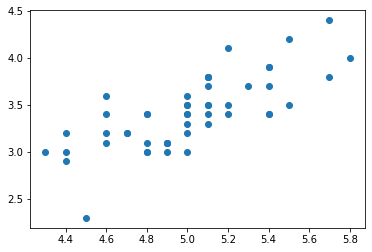

In [6]:
# 꽃 데이터 총 3종류 1종류 당 50개씩 존재
sub_data = np_data[:50, [0,1]].astype(np.float64) # == sub_data = np_data[:, :2]
_, axe = plt.subplots()
axe.scatter(sub_data[:,0], sub_data[:,1])

0.8072336651226961 -0.6230117276042169


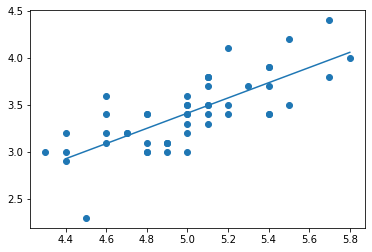

In [12]:
# 회귀성 찾기
# y = ax + b
# a = (x와 y의 상관관계 계수) * (y std_dev / x std_dev)
# b = mean_y - (a*mean_x)
xs = sub_data[:, 0] # 꽃 - 길이
ys = sub_data[:, 1] # 꽃 - 폭

# 상관관계 계수 구하기 
corr = np.corrcoef(xs, ys)[0, 1]
std_y = np.std(ys)
std_x = np.std(xs)
mean_y = np.mean(ys)
mean_x = np.mean(xs)

a = corr * (std_y/std_x)
b = mean_y - (a * mean_x)
print(a, b)

_, axe = plt.subplots()
axe.scatter(xs, ys)
axe.plot(np.linspace(4.4, 5.8, 10), a*np.linspace(4.4, 5.8, 10)+b )

In [19]:
# 에러 값을 구해보자 
# y = 0.81x - 0.62
# y = ax + b
#print(xs)
#print(ys)  # actual 
ys_pred = a*xs+b  # pred, 예측값
print(ys_pred)
err = ys_pred - ys

# SSE : squared sum of error
print(np.sum(err**2))

[3.49387996 3.33243323 3.1709865  3.09026313 3.4131566  3.73605006
 3.09026313 3.4131566  2.9288164  3.33243323 3.73605006 3.25170986
 3.25170986 2.84809303 4.05894353 3.97822016 3.73605006 3.49387996
 3.97822016 3.49387996 3.73605006 3.49387996 3.09026313 3.49387996
 3.25170986 3.4131566  3.4131566  3.57460333 3.57460333 3.1709865
 3.25170986 3.73605006 3.57460333 3.81677343 3.33243323 3.4131566
 3.81677343 3.33243323 2.9288164  3.49387996 3.4131566  3.00953977
 2.9288164  3.4131566  3.49387996 3.25170986 3.49387996 3.09026313
 3.6553267  3.4131566 ]
3.146569429387998


0.30630821115803575
0.18926247288503265 -0.03308026030368777
sse: 0.5103579175704989


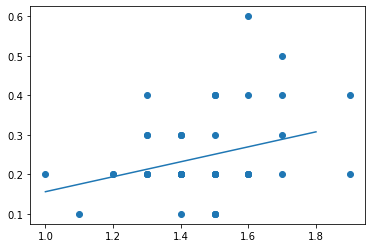

In [42]:
xs = np_data[:50, 2].astype(np.float64) # 첫번째 품종만
ys = np_data[:50, 3].astype(np.float64)
#print(xs) # 잎 - 길이
#print(ys) # 잎 - 폭

corr = np.corrcoef(xs, ys)[0, 1]
print(corr)
std_y = np.std(ys)
std_x = np.std(xs)
mean_y = np.mean(ys)
mean_x = np.mean(xs)

slope = corr * (std_y/std_x)
intercept = mean_y - (slope * mean_x)
print(slope, intercept)

_, axe = plt.subplots()
axe.scatter(xs, ys)
#회귀선 그리기(예상값)
axe.plot(np.linspace(1.0, 1.8, 10), np.linspace(1.0, 1.8, 10)*slope+intercept)

ys_pred = xs*slope+intercept
err = ys_pred - ys
sse_value = np.sum(err**2)
print('sse:', sse_value)